# Pipeline Iris

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.datasets import load_iris

from sklearn.tree import DecisionTreeClassifier

from sklearn.feature_selection import SequentialFeatureSelector

import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt

### Load data

In [78]:
X = pd.DataFrame(load_iris().data, columns=load_iris().feature_names)
y = (pd.Series(load_iris().target, name='species')
       .replace({i:j for i,j in enumerate(load_iris().target_names)}))
df = pd.concat((y,X), axis=1)


In [96]:
dt_stump = DecisionTreeClassifier(max_depth=1)

In [109]:
dt_stump.fit(X.iloc[:,0:2],y)
dt_stump.score(X.iloc[:,0:2],y)

0.6266666666666667

In [103]:
for i in range(4):
    dt_stump.fit(np.ravel(X.iloc[:,i]),np.ravel(y))
    print(dt_stump.score(np.ravel(X.iloc[:,i]),np.ravel(y)))

ValueError: Expected 2D array, got 1D array instead:
array=[5.1 4.9 4.7 4.6 5.  5.4 4.6 5.  4.4 4.9 5.4 4.8 4.8 4.3 5.8 5.7 5.4 5.1
 5.7 5.1 5.4 5.1 4.6 5.1 4.8 5.  5.  5.2 5.2 4.7 4.8 5.4 5.2 5.5 4.9 5.
 5.5 4.9 4.4 5.1 5.  4.5 4.4 5.  5.1 4.8 5.1 4.6 5.3 5.  7.  6.4 6.9 5.5
 6.5 5.7 6.3 4.9 6.6 5.2 5.  5.9 6.  6.1 5.6 6.7 5.6 5.8 6.2 5.6 5.9 6.1
 6.3 6.1 6.4 6.6 6.8 6.7 6.  5.7 5.5 5.5 5.8 6.  5.4 6.  6.7 6.3 5.6 5.5
 5.5 6.1 5.8 5.  5.6 5.7 5.7 6.2 5.1 5.7 6.3 5.8 7.1 6.3 6.5 7.6 4.9 7.3
 6.7 7.2 6.5 6.4 6.8 5.7 5.8 6.4 6.5 7.7 7.7 6.  6.9 5.6 7.7 6.3 6.7 7.2
 6.2 6.1 6.4 7.2 7.4 7.9 6.4 6.3 6.1 7.7 6.3 6.4 6.  6.9 6.7 6.9 5.8 6.8
 6.7 6.7 6.3 6.5 6.2 5.9].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

### EDA

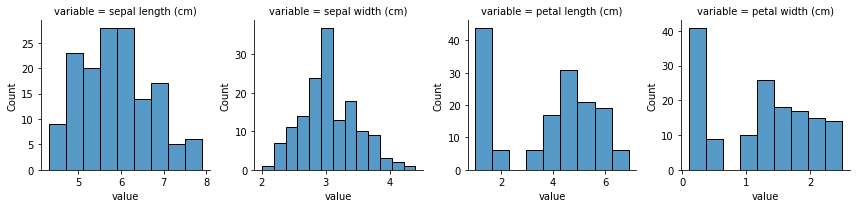

In [80]:
g = sns.FacetGrid(df.melt(id_vars='species'), col="variable", col_wrap=4, sharex=False, sharey=False)
g.map(sns.histplot, "value")
plt.show()

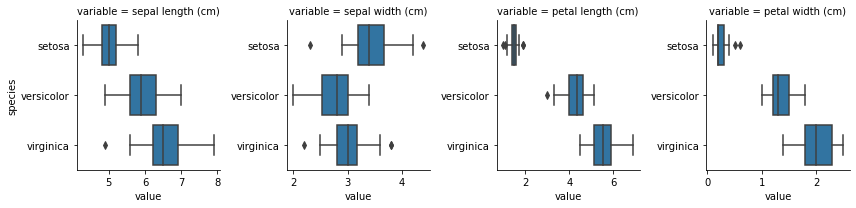

In [79]:
g = sns.FacetGrid(df.melt(id_vars='species'), col="variable", col_wrap=4, sharex=False, sharey=False)
g.map(sns.boxplot, "value", "species", order=load_iris().target_names)
plt.show()

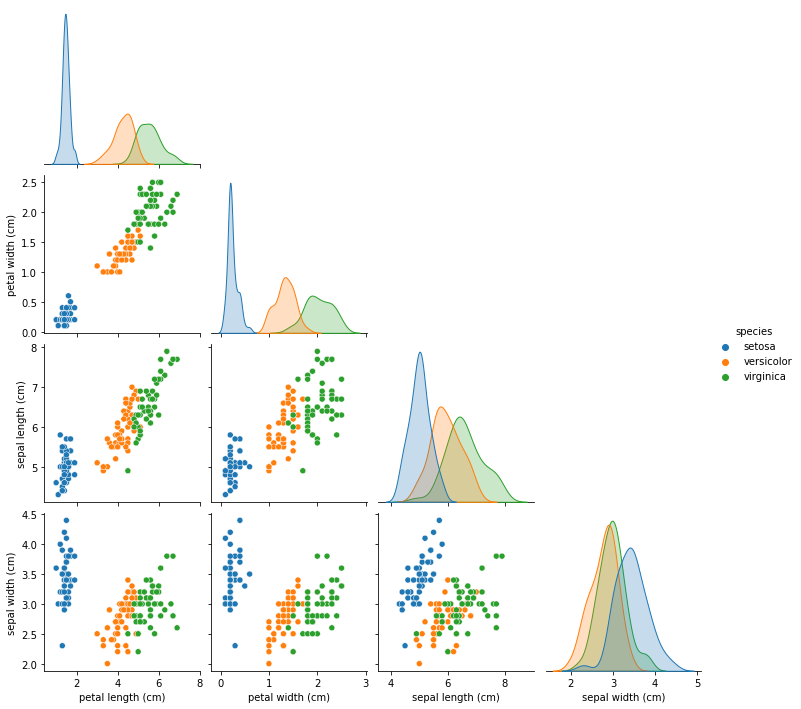

In [89]:
sns.pairplot(df, 
             x_vars=sorted(load_iris().feature_names), 
             y_vars=sorted(load_iris().feature_names), 
             hue='species',
             corner=True)
plt.show()

### Analyze

In [20]:
Xtr,Xte,ytr,yte = train_test_split(X, y, test_size=.2)

In [24]:
pipe1 = Pipeline([('scaler', StandardScaler()), ('eigens', PCA()), ('svc', SVC())])
pipe2 = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])
pipe3 = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])

In [49]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [47]:
pipe1.fit(Xtr,ytr)
pipe2.fit(Xtr,ytr)

Pipeline(steps=[('scaler', StandardScaler()), ('svc', SVC())])

In [48]:
pipe1.score(Xte, yte), pipe2.score(Xte, yte)

(1.0, 1.0)

In [45]:
preds1 = pd.Series(pipe1.predict(Xte), index=Xte.index, name='preds1')

In [46]:
pd.concat((preds1, yte), axis=1)

,preds1,species
20,setosa,setosa
44,setosa,setosa
141,virginica,virginica
145,virginica,virginica
16,setosa,setosa
128,virginica,virginica
18,setosa,setosa
80,versicolor,versicolor
24,setosa,setosa
109,virginica,virginica
